# Entropic Regularization of Optimal Transport

In [121]:
import numpy as np
import matplotlib.pyplot as plt
import osborn

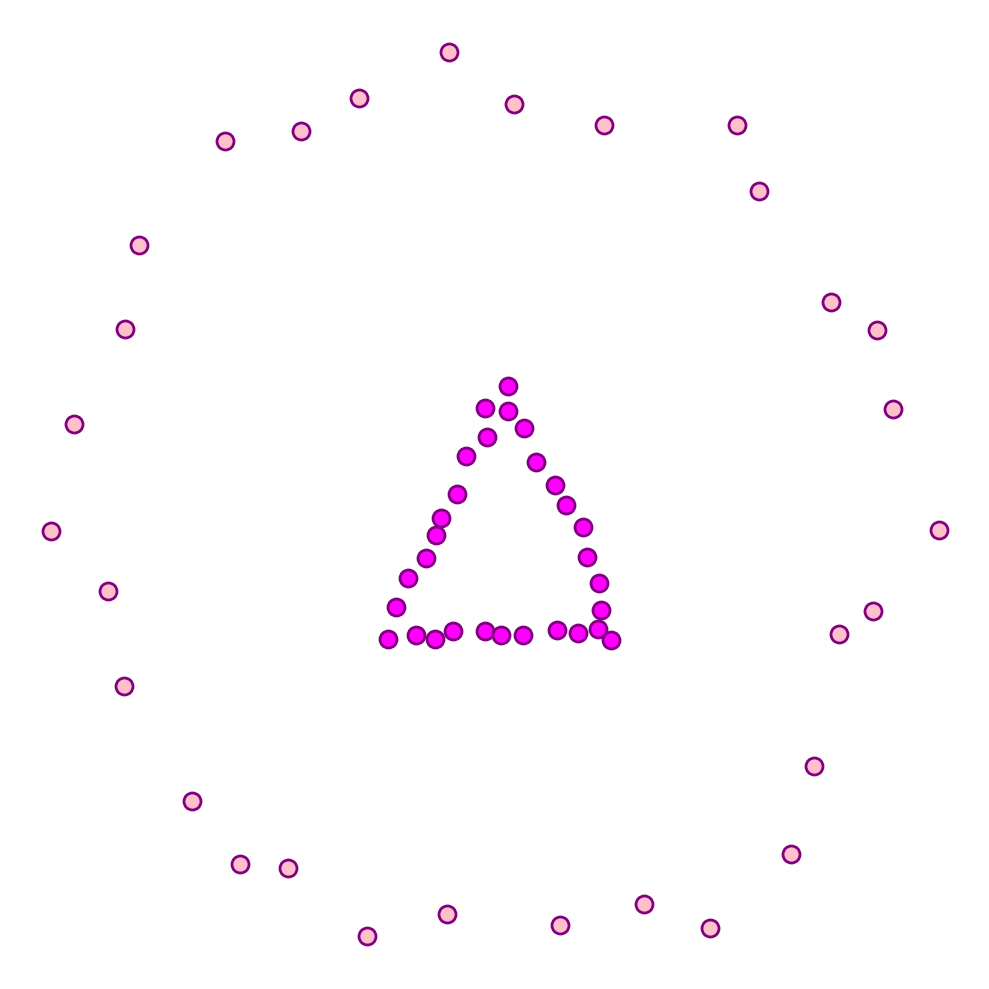

In [142]:
n = 30
m = n
gauss = lambda q,a,c: a*np.random.randn(2, q) + np.transpose(np.tile(c, (q,1)))
X = np.random.randn(2,n)*.3
Y = np.hstack((gauss(int(m/2),.5,[0,1.6]),np.hstack((gauss(int(m/4),.3,[-1,-1]),gauss(int(m/4),.3,[1,-1])))))

# Define the vertices of the triangle
vertex1 = np.array([-np.sqrt(3)/6, -np.sqrt(3)/6])
vertex2 = np.array([np.sqrt(3)/6, -np.sqrt(3)/6])
vertex3 = np.array([0, np.sqrt(3)/6])

# Number of points on each edge
num_points_per_edge = 10

# Generate points on the edges
edge1_points = np.linspace(vertex1, vertex2, num_points_per_edge, endpoint=False) + np.random.randn(2,num_points_per_edge).T * 1e-2
edge2_points = np.linspace(vertex2, vertex3, num_points_per_edge, endpoint=False) + np.random.randn(2,num_points_per_edge).T * 1e-2
edge3_points = np.linspace(vertex3, vertex1, num_points_per_edge, endpoint=False) + np.random.randn(2,num_points_per_edge).T * 1e-2

# Combine points from all edges
X = np.vstack((edge1_points, edge2_points, edge3_points)).T

theta = np.linspace(0, 2*np.pi, m, endpoint=False)
Y = ([0,0] + 1. * np.column_stack((np.cos(theta), np.sin(theta))) + np.random.randn(2, m).T * 6e-2).T

idxX = list(range(n))
np.random.shuffle(idxX)
# X = X[:, idxX]

x = X
y = Y

plt.figure(figsize=(10,10))
plotp = lambda x,col: plt.scatter(x[0,:], x[1,:], s=150, edgecolors="purple", c=col, linewidths=2)
plotp(x, 'magenta')
plotp(y, 'pink')
plt.axis("off")
plt.xlim(np.min(y[0,:])-.1,np.max(y[0,:])+.1)
plt.ylim(np.min(y[1,:])-.1,np.max(y[1,:])+.1)
plt.tight_layout()
plt.savefig(f"data_sinkhorn.pdf")
plt.show()

In [122]:
x2 = np.sum(x**2,0)
y2 = np.sum(y**2,0)
C = np.tile(y2,(N[0],1)) + np.tile(x2[:,np.newaxis],(1,N[1])) - 2*np.dot(np.transpose(x),y)

a = np.ones(N[0])/N[0]
b = np.ones(N[1])/N[1]

epsilon = 1e-2
K = np.exp(-C/epsilon)
v = np.ones(N[1])

u = a / (np.dot(K,v))
v = b / (np.dot(np.transpose(K),u))


/var/folders/rj/j_zv_k4525l7mz1yjsr_p2yr0000gn/T/ipykernel_55663/1804919562.py:24: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(np.asarray(Err_q)), linewidth = 2)


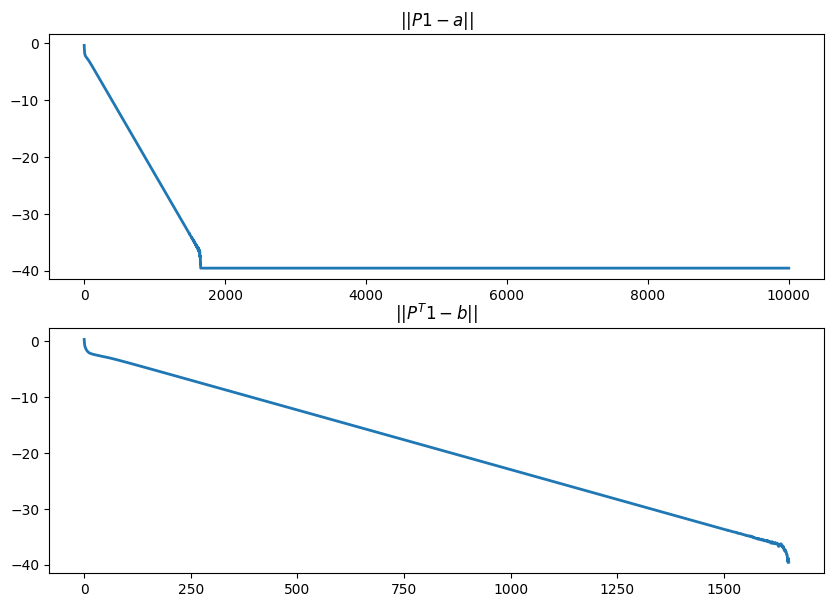

In [217]:
epsilon = .01;
K = np.exp(-C/epsilon)
v = np.ones(n)
niter = 10000
Err_p = []
Err_q = []
for i in range(niter):
    # sinkhorn step 1
    u = a / (np.dot(K,v))
    # error computation
    r = v*np.dot(np.transpose(K),u)
    Err_q = Err_q + [np.linalg.norm(r - b, 1)]
    # sinkhorn step 2
    v = b /(np.dot(np.transpose(K),u))
    s = u*np.dot(K,v)
    Err_p = Err_p + [np.linalg.norm(s - a,1)]
    
plt.figure(figsize = (10,7))
plt.subplot(2,1,1)
plt.title("$||P 1 - a||$")
plt.plot(np.log(np.asarray(Err_p)), linewidth = 2)
plt.subplot(2,1,2)
plt.title("$||P^T 1 - b||$")
plt.plot(np.log(np.asarray(Err_q)), linewidth = 2)
plt.show()

/var/folders/rj/j_zv_k4525l7mz1yjsr_p2yr0000gn/T/ipykernel_55663/2969956606.py:20: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(np.asarray(Err_p)), linewidth = 2)
/var/folders/rj/j_zv_k4525l7mz1yjsr_p2yr0000gn/T/ipykernel_55663/2969956606.py:23: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(np.asarray(Err_q)), linewidth = 2)


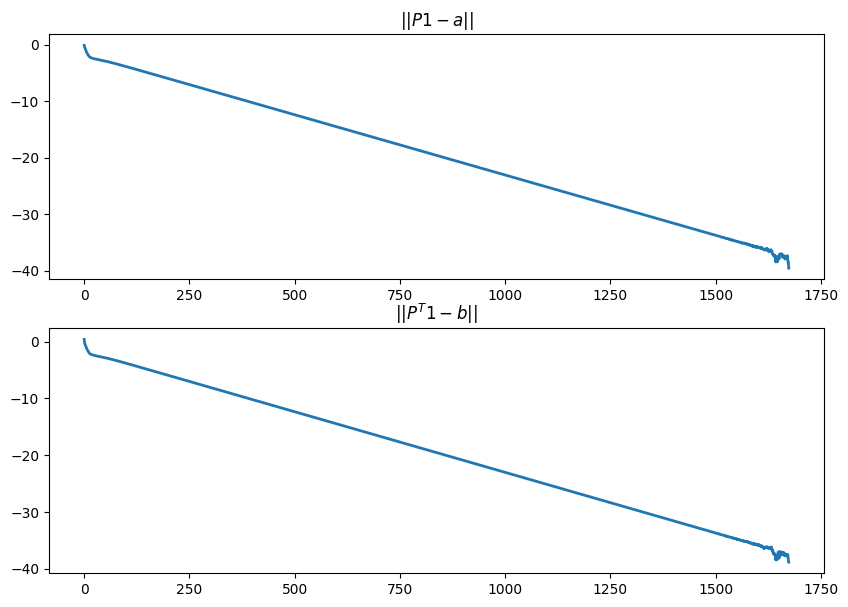

In [216]:
epsilon = .01;
K = P
v = np.ones(n)
niter = 5000
Err_p = []
Err_q = []
for i in range(niter):
    # sinkhorn step 1
    u = a / (np.dot(K,v))
    # error computation
    r = v*np.dot(np.transpose(K),u)
    Err_q = Err_q + [np.linalg.norm(r - b, 1)]
    # sinkhorn step 2
    v = b /(np.dot(np.transpose(K),u))
    s = u*np.dot(K,v)
    Err_p = Err_p + [np.linalg.norm(s - a,1)]
plt.figure(figsize = (10,7))
plt.subplot(2,1,1)
plt.title("$||P 1 - a||$")
plt.plot(np.log(np.asarray(Err_p)), linewidth = 2)
plt.subplot(2,1,2)
plt.title("$||P^T 1 - b||$")
plt.plot(np.log(np.asarray(Err_q)), linewidth = 2)
plt.show()

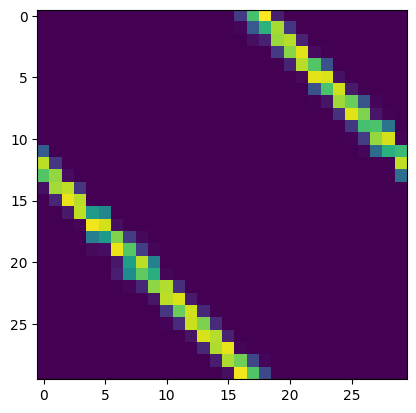

In [204]:
P = np.dot(np.dot(np.diag(u),K),np.diag(v))
plt.imshow(P);

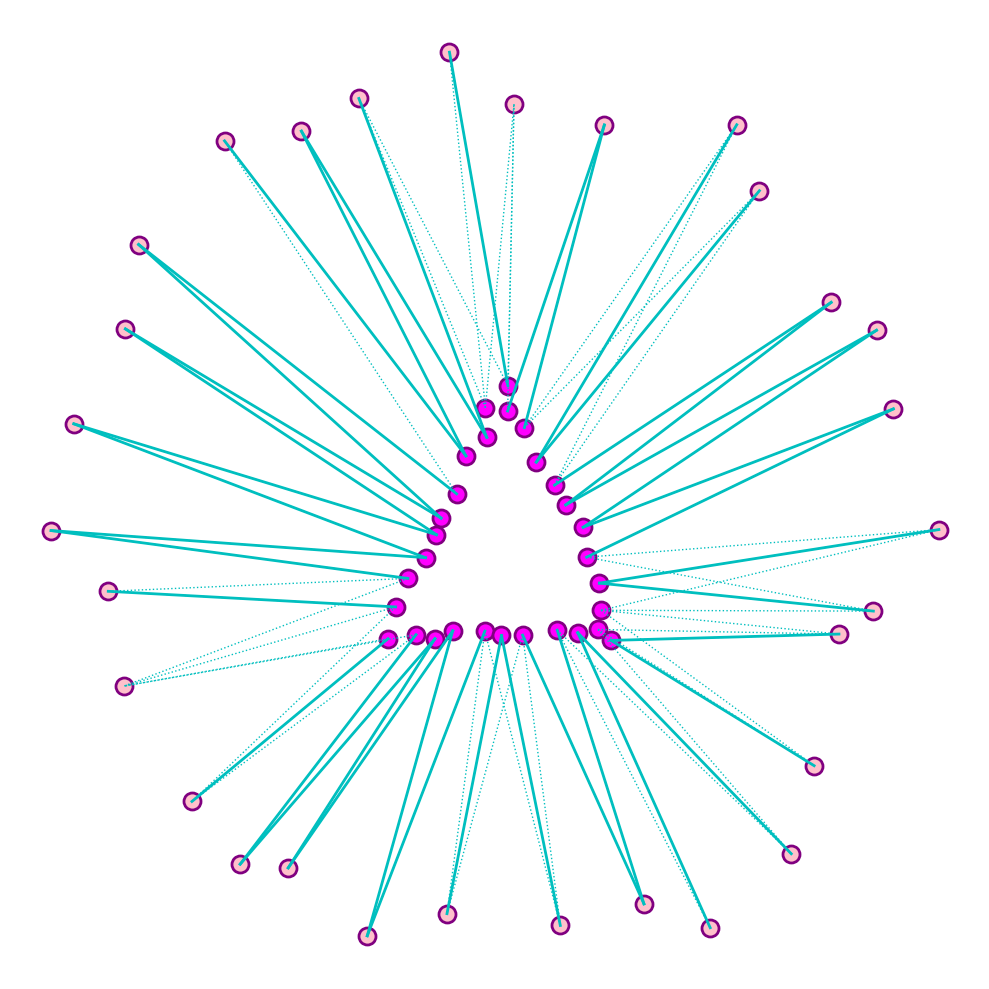

In [205]:
plt.figure(figsize=(10,10))
plotp = lambda x,col: plt.scatter(x[0,:], x[1,:], s=150, edgecolors="purple", c=col, linewidths=2)
plotp(x, 'magenta')
plotp(y, 'pink')

A = P * (P > np.max(P)*.8)
i,j = np.where(A != 0)
plt.plot([x[0,i],y[0,j]],[x[1,i],y[1,j]],'c',lw = 2)

A = P * (P > np.max(P)*.2)
i,j = np.where(A != 0)
plt.plot([x[0,i],y[0,j]],[x[1,i],y[1,j]],'c:',lw = 1)

plt.axis("off")
plt.xlim(np.min(y[0,:])-.1,np.max(y[0,:])+.1)
plt.ylim(np.min(y[1,:])-.1,np.max(y[1,:])+.1)
plt.tight_layout()
plt.savefig(f"assignement_sinkhorn.pdf")
plt.show()


2032
[0.03333333 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333
 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333
 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333
 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333
 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333]
[0.03333333 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333
 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333
 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333
 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333
 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333]


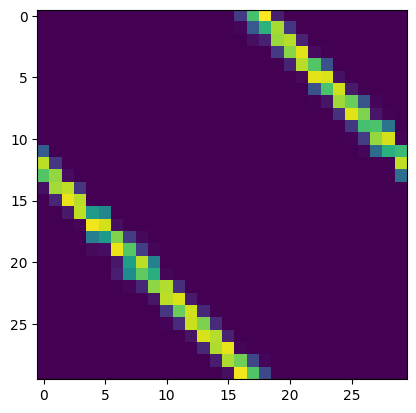

In [193]:
# import osborn
# import scipy

# K = np.exp(-C/1e-2)
# K = scipy.sparse.csr_array(K / K.sum(axis=0) * a)
# # print(K.toarray())

# balancer = osborn.MatrixBalancerSinkhorn(matrix=K, epsilon=1e-10, a=a, b=b)
# P, it = balancer.balance("random")

# P /= P.sum(axis=0)
# P *= a
print(it)
print(P.sum(axis=0))
print(P.sum(axis=1))
plt.imshow(P)
plt.show()

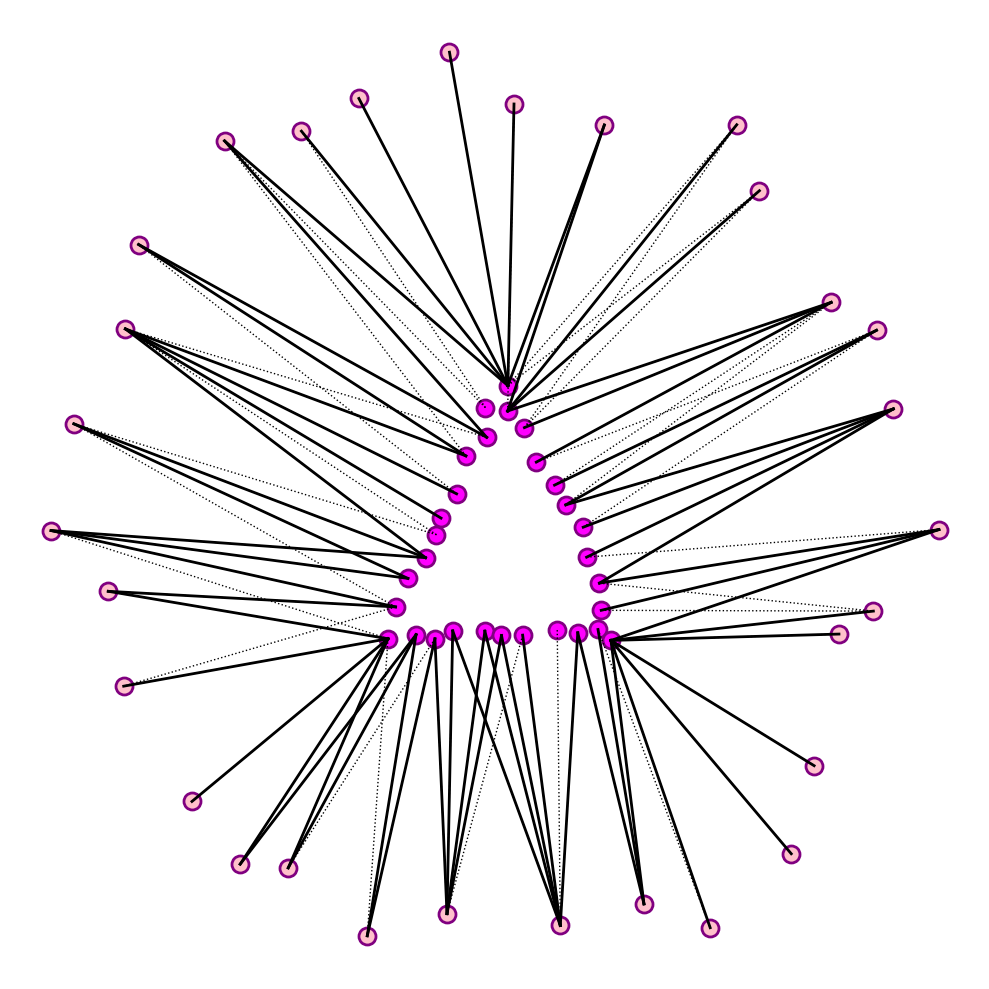

In [189]:
plt.figure(figsize=(10,10))

plotp(x, 'magenta')
plotp(y, 'pink')

A = P * (P > np.max(P)*.09)
i,j = np.where(A != 0)
plt.plot([x[0,i],y[0,j]],[x[1,i],y[1,j]],'k',lw = 2)

A = P * (P > np.max(P)*.02)
i,j = np.where(A != 0)
plt.plot([x[0,i],y[0,j]],[x[1,i],y[1,j]],'k:',lw = 1)

plt.axis("off")
plt.xlim(np.min(y[0,:])-.1,np.max(y[0,:])+.1)
plt.ylim(np.min(y[1,:])-.1,np.max(y[1,:])+.1)

plt.axis("off")
plt.xlim(np.min(y[0,:])-.1,np.max(y[0,:])+.1)
plt.ylim(np.min(y[1,:])-.1,np.max(y[1,:])+.1)
plt.tight_layout()
plt.savefig(f"assignement_osborn.pdf")
plt.show()

925
[5.92230559e-20 2.41154443e-26 1.93301225e-26 2.31858221e-26
 1.10090523e-26 1.20482906e-24 1.15693954e-24 1.03338278e-24
 1.00770094e-23 1.06574910e-23 5.99834832e-20 3.76796362e-28
 1.02919998e-25 3.11504756e-23 3.04517129e-24 3.31945045e-24
 4.63396294e-26 1.65514620e-24 8.29568213e-24 1.12632090e-23
 5.97539504e-20 1.77440907e-22 2.32001679e-24 1.84771498e-23
 2.94685143e-23 5.18777653e-24 3.28346059e-25 4.67433832e-23
 7.16935332e-22 2.86400199e-24]
[5.92230559e-20 2.41154443e-26 1.93301226e-26 2.31858222e-26
 1.10090538e-26 1.20483067e-24 1.15693970e-24 1.03338295e-24
 1.00770112e-23 1.06574916e-23 5.99834832e-20 3.76796364e-28
 1.02919999e-25 3.11504756e-23 3.04517128e-24 3.31945046e-24
 4.63396294e-26 1.65514620e-24 8.29568213e-24 1.12632090e-23
 5.97539504e-20 1.77440907e-22 2.32001764e-24 1.84771498e-23
 2.94685143e-23 5.18777653e-24 3.28346059e-25 4.67433833e-23
 7.16935332e-22 2.86400199e-24]
1.8004334102266396e-19
1.8004334102266399e-19


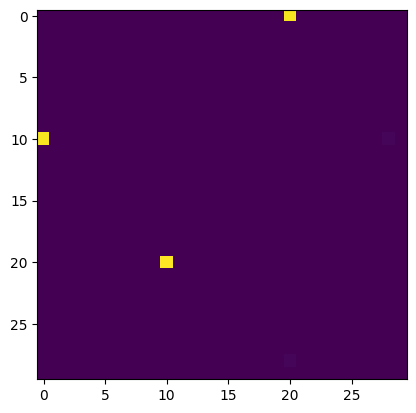

In [215]:
import osborn
import scipy

K = np.exp(-C/1e-2)
K = scipy.sparse.csr_array(K)
# print(K.toarray())

balancer = osborn.MatrixBalancer(matrix=K, epsilon=1e-10)
P, it = balancer.balance("random")

# P /= P.sum()
# P /= P.sum(axis=0)
print(it)
print(P.sum(axis=0))
print(P.sum(axis=1))
print(P.sum(axis=0).sum())
print(P.sum(axis=1).sum())
plt.imshow(P)
plt.show()

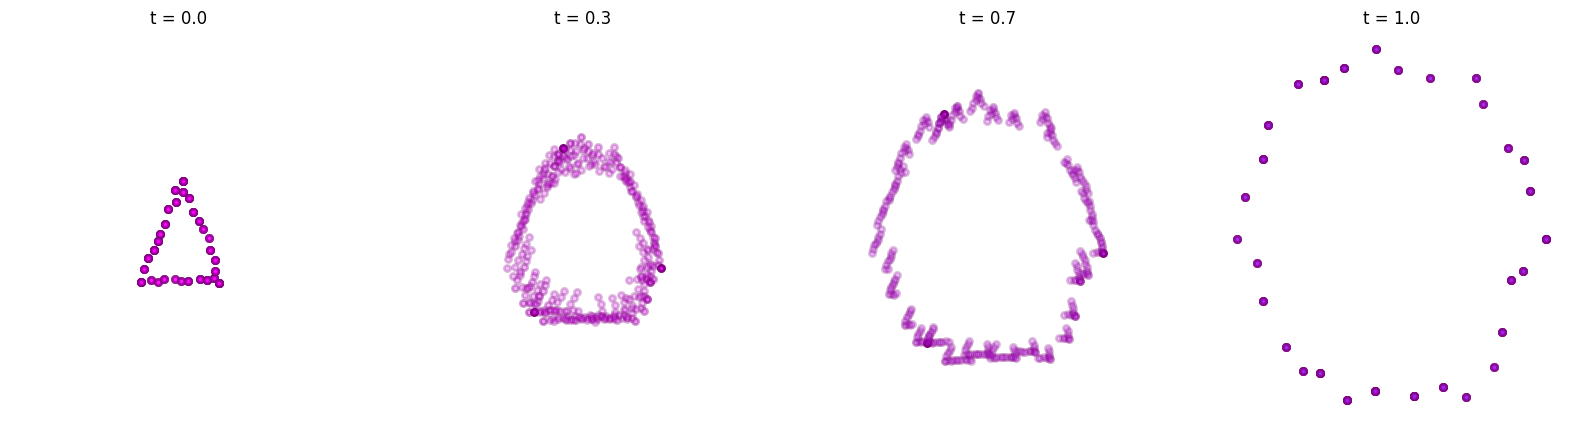

In [179]:
I, J = np.nonzero(P > 1e-5)
myplot = lambda x,y,ms,col: plt.scatter(x,y, s=1*20, edgecolors="purple", c=col, linewidths=2, alpha=(1/4 + 3*ms/4))
Pij = P[I,J]
plt.figure(figsize =(20,5))
tlist = np.linspace(0, 1, 4)
for i in range(len(tlist)):
    t = tlist[i]
    Xt = (1-t)*x[:,I] + t*y[:,J]
    plt.subplot(1,4,i+1)
    plt.axis("off")
    for j in range(len(Pij)):
        myplot(Xt[0,j],Xt[1,j], Pij[j]/np.max(P),[[t*0.63 + (1-t), t*.13, t*0.94 + (1-t)]])
    plt.title("t = %.1f" %t) 
    plt.xlim(np.min(y[0,:])-.1,np.max(y[0,:])+.1)
    plt.ylim(np.min(y[1,:])-.1,np.max(y[1,:])+.1)